<a href="https://colab.research.google.com/github/bahkali/project-1-ML-Classifier/blob/main/vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

tf.__version__

'2.4.1'

In [2]:
# import cifar-10 datasets

(train_images, train_labels), (test_images, test_labels) =  tf.keras.datasets.cifar10.load_data()
train_images.shape , train_labels.shape, test_images.shape, test_labels.shape

170500096/170498071 [==============================] - 3s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
# get partial image and normalize

x_train, x_val = train_images[5000:] / 255.0, train_images[:5000]/255.0
y_train, y_val = train_labels[5000:], train_labels[:5000]
x_test = test_images / 255.0

In [6]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
r = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)

Epoch 1/200
1407/1407 [==============================] - 15s 6ms/step - loss: 1.9070 - accuracy: 0.4029 - val_loss: 1.2698 - val_accuracy: 0.5656
Epoch 2/200
1407/1407 [==============================] - 8s 5ms/step - loss: 1.0545 - accuracy: 0.6304 - val_loss: 1.0792 - val_accuracy: 0.6360
Epoch 3/200
1407/1407 [==============================] - 8s 5ms/step - loss: 0.8491 - accuracy: 0.7046 - val_loss: 0.7196 - val_accuracy: 0.7492
Epoch 4/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7431 - accuracy: 0.7395 - val_loss: 0.6642 - val_accuracy: 0.7654
Epoch 5/200
1407/1407 [==============================] - 8s 5ms/step - loss: 0.6561 - accuracy: 0.7756 - val_loss: 0.7373 - val_accuracy: 0.7448
Epoch 6/200
1407/1407 [==============================] - 8s 5ms/step - loss: 0.5855 - accuracy: 0.7969 - val_loss: 0.8064 - val_accuracy: 0.7354
Epoch 7/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5222 - accuracy: 0.8203 - val_loss: 0.5347 - val_a

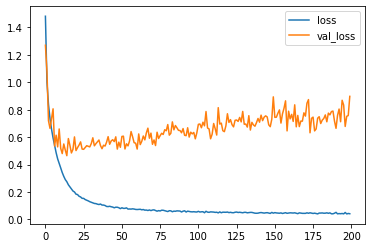

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

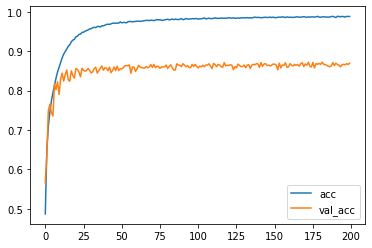

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
test_loss, test_acc = model.evaluate(x_test,  test_labels, verbose=2)

313/313 - 1s - loss: 1.0819 - accuracy: 0.8511


In [12]:
print(test_acc)


0.8511000275611877
